## Run to create slurm job

model_path = [path to .json template]
%run [path to l1analysis_notebook.ipynb]

In [1]:
model_path = '/data00/projects/YOUR_PROJECT/scripts/L1/task-beta.json'
%run '/data00/tools/cnlab_pipeline/L1/l1analysis_notebook.ipynb'


Using template template-bbprime_beta.json: BBPRIME default pipeline
	6mm FWHM smoothing
	No global scaling
	FAST correlation
	x_trans, y_trans, z_trans, x_rot, y_rot, z_rot, csf, trash regressor (FD > 0.75 | GS > 3 SD)
Using template task-share_beta.json: BBPRIME share task
----
Processing 85 participants:
['BPA01', 'BPA02', 'BPA03', 'BPA04', 'BPA05', 'BPA06', 'BPA08', 'BPA09', 'BPA10', 'BPA11', 'BPA12', 'BPA14', 'BPA15', 'BPA16', 'BPA17', 'BPA18', 'BPA19', 'BPA21', 'BPA23', 'BPA26', 'BPA27', 'BPA28', 'BPA29', 'BPA30', 'BPA31', 'BPA32', 'BPA33', 'BPA34', 'BPA35', 'BPA36', 'BPA37', 'BPA38', 'BPA41', 'BPA42', 'BPA43', 'BPA44', 'BPA45', 'BPA46', 'BPA47', 'BPA48', 'BPP04', 'BPP05', 'BPP06', 'BPP07', 'BPP11', 'BPP12', 'BPP13', 'BPP15', 'BPP19', 'BPP20', 'BPP21', 'BPP22', 'BPP24', 'BPP25', 'BPP26', 'BPP29', 'BPP30', 'BPP33', 'BPP34', 'BPP36', 'BPP37', 'BPP38', 'BPP40', 'BPP41', 'BPP42', 'BPP43', 'BPP44', 'BPP46', 'BPP47', 'BPP49', 'BPP51', 'BPP52', 'BPP53', 'BPP54', 'BPP56', 'BPP58', 'BPP60'

In [2]:
def show_DM(spm_file):
    import os
    import matplotlib.pylab as plt
    import pandas as pd
    import scipy.io as sio
    from nistats import reporting
    
    %matplotlib inline 
    
    if not os.path.exists(spm_file):
        print('Cannot find SPM.mat file')
        return False
    
    spm_mat=sio.loadmat(spm_file, 
               squeeze_me=True, struct_as_record=False)
    
    DM = spm_mat['SPM'].xX.X
    regressor_labels = spm_mat['SPM'].xX.name
    
    design_matrix = pd.DataFrame(DM, columns=regressor_labels)
    fig,ax = plt.subplots(figsize=(10,16))
    reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
    plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

 | Using Nistats with Nilearn versions >= 0.7.0 is redundant and potentially conflicting.
 | Nilearn versions 0.7.0 and up offer all the functionality of Nistats as well the latest features and fixes.
 | We strongly recommend uninstalling Nistats and using Nilearn's stats & reporting modules.

  


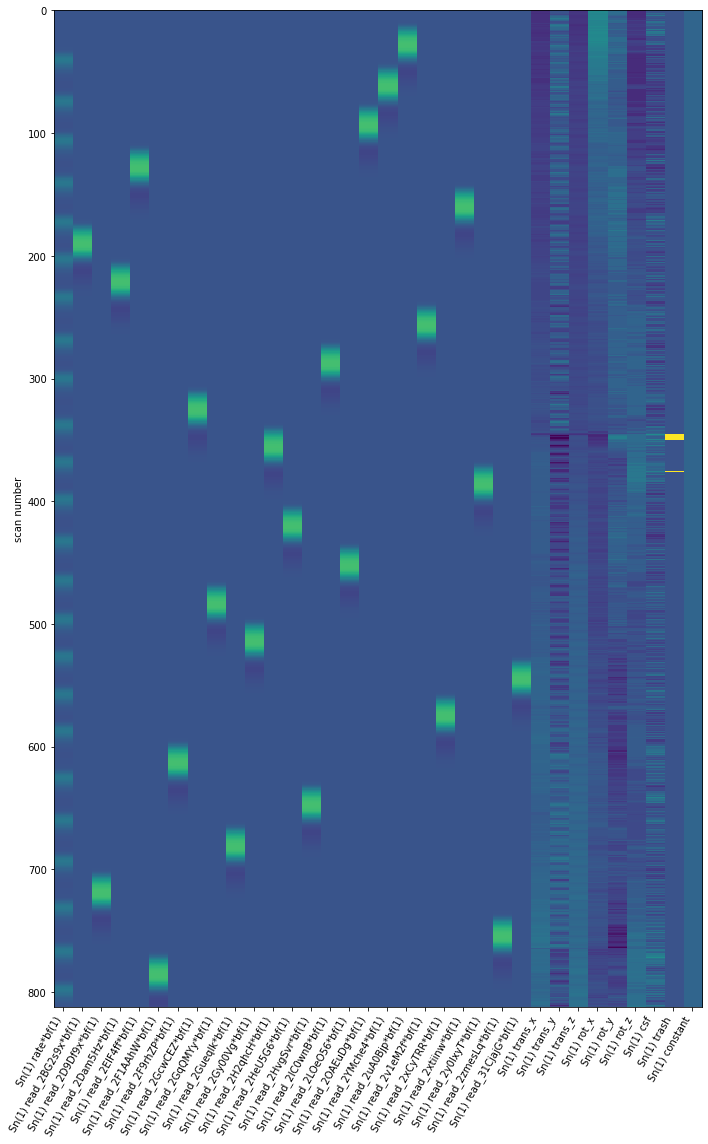

In [6]:
show_DM('/data00/projects/bbprime/data/bids_data/derivatives/nipype/task-read_model-beta/sub-BPA01/SPM.mat')